<small><i>June 2019 - This notebook was created by [Oriol Pujol Vila](http://www.maia.ub.es/~oriol). Source and [license](./LICENSE.txt) info are in the folder.</i></small>

# Neural networks and deep learning

In [ ]:
# You will need tensorflow for this notebook
#!pip install -q tensorflow==2.1

## Introductory concepts

Consider the problem up to this point. Let us recall the three basic components of the algorithm. 

+ **The model class** 
+ **The loss function**
+ **The optimization algorithm**

<div class = "alert alert-success" style = "border-radius:10px;border-width:3px"><b> In pairs:</b> Think about an example of each of the three elements.</div>

Let me introduce the best "hands-down" learning algorithm: **The Human Learning Algorithm**

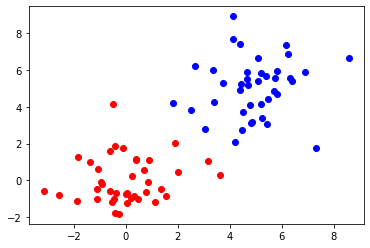

In [1]:
%matplotlib inline
import numpy as np

#Create some data
X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])

#Visualize
import matplotlib.pyplot as plt
plt.scatter(X[0:40,0],X[0:40,1],color='r')
plt.scatter(X[40:,0],X[40:,1],color='b')

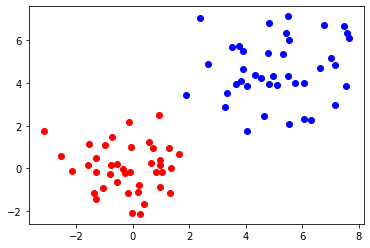

interactive(children=(FloatSlider(value=0.0, description='w0', max=10.0, min=-10.0), FloatSlider(value=0.0, de…

In [2]:
#from sklearn import 
import numpy as np
#Create some data
X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])

#Visualize
import matplotlib.pyplot as plt
from ipywidgets import interact

def human_learning_algorithm(X,y):
    
    plt.scatter(X[0:40,0],X[0:40,1],color='r')
    plt.scatter(X[40:,0],X[40:,1],color='b')  
    delta = 0.025
    xx = np.arange(-5.0, 10.0, delta)
    yy = np.arange(-5.0, 10.0, delta)
    XX, YY = np.meshgrid(xx, yy)
    Xf = XX.flatten()
    Yf = YY.flatten()
    sz=XX.shape
    data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);

    def hml_display(w0,w1,offset):
        w=np.array([w0,w1])
        w.shape=(2,1)
        #Evaluate the model for a given weight
        Z = data.dot(w)+offset
        Z.shape=sz
        plt.scatter(X[0:40,0],X[0:40,1],color='r')
        plt.scatter(X[40:,0],X[40:,1],color='b')
        plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,10,-5,10),alpha=0.3, vmin=-15, vmax=15)
        plt.contour(XX,YY,Z,[0])
        fig = plt.gcf()
        fig.set_size_inches(9,9)
   
    #Ipython 2.0      
    interact(hml_display, w0=(-10.,10.), w1=(-10.,10.), offset=(-20.,40.));
    
human_learning_algorithm(X,y)

Let us consider the following graph representation of the problem:
<img src = "pipeline1.png"  width = "200">

The model function is $f(x,\omega)$, where $\omega$ are the parameters to optimise. For example, in the case of a linear model we may have $f(x,\omega) = \sum_i \omega_i x_i = \omega^T x$. The loss function is represented with $\mathcal{L}(y,t)$, where $y=f(x,\omega)$ and $t$ is the target value. Remember that the loss function models the dissimilarity between the output of the model and the true value to predict. The last element of the learning algorithm is the optimisation algorithm. In our case is an algorithm with the goal of minimizing the dissimilarity between target value and the model output, i.e.

$$\underset{\omega}{\text{minimize}} \quad \mathcal{L}(f(x,\omega),t)$$

Let us refactor the code using OOP in order to take into account these three elements:

In [3]:
class model:
    def __init__(self):
        pass
    def forward(self,x):
        #Takes a data point and evaluates f(x,w)
        pass

class loss:
    def __init__(self):
        pass
    def evaluate(self,x,t):
        #Evaluates the loss function L(y,t)
        pass

class optimize:
    def __init__(self):
        pass
    def run(self, data, target, model, loss):
        #Takes a loss function and a model and find the optimal parameters for an specific data set
        pass
    

We know one way of optimising algorithms in front of large scale data sets, i.e. stochastic subgradient methods. In short this is an iterative algorithm that updates the unknown variables proportional to minus the gradient magnitude at each iteration. 

Let us fill in the gaps for a classical linear regression where the model is $f(x,\omega) = \omega^Tx$, 

In [4]:
import numpy as np
class model:
    def __init__(self,w):
        self.w = w
    def forward(self,x):
        #Takes a data point and evaluates f(x,w)
        return np.dot(self.w,x.T)

using a least squares loss function $\mathcal{L}(y,t) = (t-y)^2$,




In [5]:
class loss:
    def __init__(self):
        pass
    def evaluate(self,model,x,t):
        #Evaluates the loss function L(y,t)
        y = model.forward(x)
        return (t-y)*(t-y)

using stochastic gradient descend,

In [6]:
class optimize:
    def __init__(self,t):
        self.num_iter = t

    def run(self, data, target, model, loss):
        #Takes a loss function and a model and find the optimal parameters for an specific data set
        N_samples = data.shape[0]
        for t in xrange(self.num_iter):
            #Step 1.-take a sample x at random from the training set
            idx = np.random.randint(N_samples)
            xi = data[idx,:]
            yi = target[idx]
            
            #Step 2.- update the parameters to optimise
            model.w = model.w - eta * "gradient_L_omega(xi,yi)"
    

The gradient with respect to the parameter to optimise is $$\nabla_\omega\mathcal{L(f(x,\omega),t)} = (\frac{\partial \mathcal{L}}{\partial \omega_1},\frac{\partial \mathcal{L}}{\partial \omega_2}, \dots, \frac{\partial \mathcal{L}}{\partial \omega_d}) = \frac{\partial \mathcal{L}}{\partial \bar{\omega}}$$.

Recall the graph representation 
<img src = "pipeline1.png"  width = "200">
and consider the chain rule
$$\frac{\partial \mathcal{L}}{\partial \bar{\omega}} = \frac{\partial \mathcal{L}}{\partial y}\frac{\partial y}{\partial \bar{\omega}}$$

Observe that the complete differentiation is easier this way. 

Given that $\mathcal{L}(y,t) = (t-y)^2$, then 
$$\frac{\partial \mathcal{L}}{\partial y} = -2(t-y)$$

Given that $y = \omega^Tx$, then 
$$ \frac{\partial y}{\partial \bar{\omega}} = x$$

Let us update the model with the corresponding gradients

In [7]:
import numpy as np
class model:
    def __init__(self,d):
        self.w = np.zeros((1,d+1))
    def forward(self,x):
        #Takes a data point and evaluates f(x,w)
        return np.dot(self.w[0,:-1],x.T)+self.w[0,-1]
    def gradient(self,x):
        return np.concatenate((x,np.array([1])))

In [8]:
class loss:
    def __init__(self):
        self.y = 0
        
    def evaluate(self,model,x,t):
        #Evaluates the loss function L(y,t)
        self.y = model.forward(x)
        return (t-self.y)*(t-self.y)
    
    def gradient(self,model,x,t):
        self.y = model.forward(x)
        return -2.*(t-self.y)

In [9]:
class optimize:
    def __init__(self):
        pass

    def run(self, data, target, model, loss, num_iter, eta):
        #Takes a loss function and a model and find the optimal parameters for an specific data set
        N_samples = data.shape[0]
        for t in range(num_iter):
            #Step 1.-take a sample x at random from the training set
            idx = np.random.randint(N_samples)
            xi = data[idx,:]
            yi = target[idx]
            
            #Step 2.- update the parameters to optimise
            model.w = model.w - eta * loss.gradient(model,xi,yi)*model.gradient(xi)

For the sake of debugging let us add some checkpoints so we can visualize the convergence curve.

In [10]:
import matplotlib.pyplot as plt
class optimize:
    def __init__(self):
        pass

    def run(self, data, target, model, loss, num_iter, eta):
        #Takes a loss function and a model and find the optimal parameters for an specific data set
        self.l = np.zeros((int(np.ceil(num_iter/1000.)),1))
        N_samples = data.shape[0]
        print (N_samples)
        i=0
        for t in range(num_iter):
            #Step 1.-take a sample x at random from the training set
            idx = np.random.randint(N_samples)
            xi = data[idx,:]
            yi = target[idx]
            # <-- Start new code
            if t%1000==0:
                self.l[i] = np.sum(loss.evaluate(model,data[:1000,:],target[:1000,0]))
                i=i+1
            ## End new code -->
            #Step 2.- update the parameters to optimise
            model.w = model.w - eta * loss.gradient(model,xi,yi)*model.gradient(xi)
    def plot(self):
        plt.plot(self.l)
        

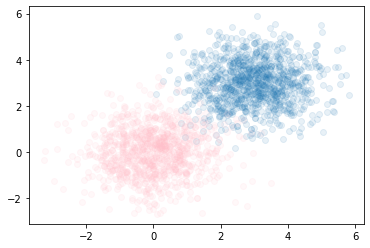

In [11]:
import numpy as np

#Example dataset
N_samples_per_class = 1000
d_dimensions = 2
x = np.vstack((np.random.randn(N_samples_per_class, d_dimensions),np.random.randn(N_samples_per_class, d_dimensions)+np.array([3,3])))
y = np.vstack((-1.*np.ones((N_samples_per_class,1)),1.*np.ones((N_samples_per_class,1))))

%matplotlib inline
import matplotlib.pyplot as plt

idx = y==1
plt.scatter(x[idx.ravel(),0],x[idx.ravel(),1],alpha=0.1)
idx = y==-1
plt.scatter(x[idx.ravel(),0],x[idx.ravel(),1],alpha=0.1,color='pink')

In [12]:
d_dimensions=2


num_iter = 10000
eta = 0.001 #optimization step/learning rate

f = model(d_dimensions)
L = loss()
opt = optimize()
opt.run(x,y,f,L,num_iter,eta)

2000


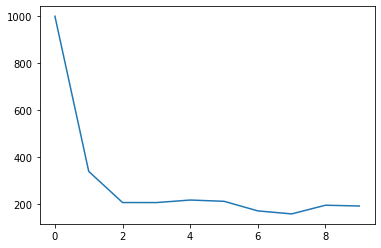

In [13]:
opt.plot()

and check the results...

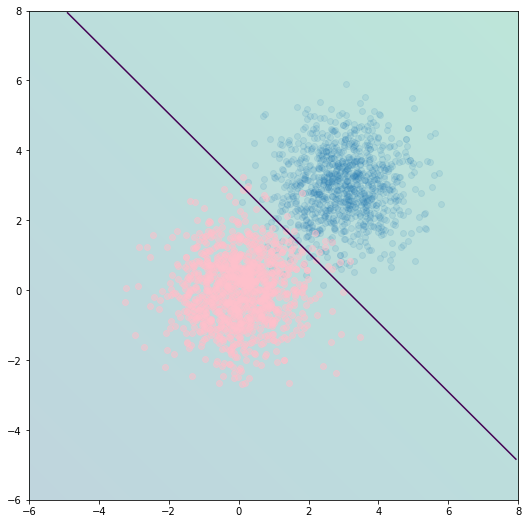

In [14]:
delta = 0.05
xx = np.arange(-5.0, 8.0, delta)
yy = np.arange(-5.0, 8.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
sz=XX.shape
test_data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);

idx = y==1
plt.scatter(x[idx.ravel(),0],x[idx.ravel(),1],alpha=0.1)
idx = y==-1
plt.scatter(x[idx.ravel(),0],x[idx.ravel(),1],alpha=0.5,color='pink')

Z = f.forward(test_data)
Z.shape=sz

plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-6,8,-6,8),alpha=0.3, vmin=-15, vmax=15)
plt.contour(XX,YY,Z,[0])
fig = plt.gcf()
fig.set_size_inches(9,9)

In [15]:
1-np.mean(np.abs(y.T-np.where(f.forward(x)>0,1.,-1.).T))

0.963

## Just for fun ... (not really)

We still do not have a perfect result. But we could modify the data set so that our classifier solves the problem perfectly. Remember that the gradient can be seen as what change we must made to a certain variable in order to maximize some cost function. What if the variable is data? This would mean how should we change data for a perfect classification?.

Let us create a new optimizer in order to update data.

<div class = "alert alert-info" style="border-radius:10px">**EXERCISE: ** Discuss how can we change the problem to get a perfect classification. Fill the blank in the code to check it.</div>

In [16]:
import numpy as np
class model:
    def __init__(self,d):
        self.w = np.zeros((1,d+1))
    def forward(self,x):
        #Takes a data point and evaluates f(x,w)
        return np.dot(self.w[0,:-1],x.T)+self.w[0,-1]
    def gradient(self,x):
        return np.concatenate((x,np.array([1])))
    def gradient_x(self,x):
        return self.w[0,:-1]

In [17]:
# my code

from IPython.display import clear_output, Image, display
%matplotlib inline

class optimize_data:
    def __init__(self):
        pass

    def run(self, data, target, model, loss, num_iter, eta):
        #Takes a loss function and a model and find the optimal parameters for an specific data set
        N_samples = data.shape[0]
        for t in range(num_iter):
            

            #Step 1.-take a sample x at random from the training set
            idx = np.random.randint(N_samples)
            xi = data[idx,:]
            yi = target[idx,:]
            
            #Step 2.- update the parameters to optimise
            data[idx,:] = data[idx,:] - eta * loss.gradient(model,xi,yi)*model.gradient_x(xi)##### YOUR CODE HERE ##############
        return data

Let us train a classifier first.

In [18]:
num_iter = 100000
eta = 0.001 #optimization step/learning rate

f = model(d_dimensions)
L = loss()
opt = optimize()
opt.run(x,y,f,L,num_iter,eta)

2000


Now we check the results and see that the result is good but does not classify all data perfectly. 

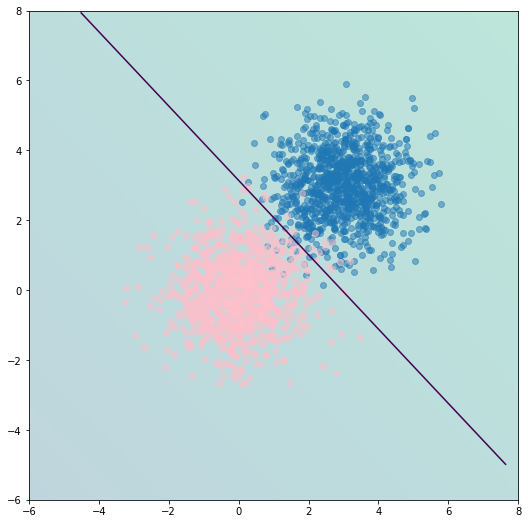

In [19]:
delta = 0.05
xx = np.arange(-5.0, 8.0, delta)
yy = np.arange(-5.0, 8.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
sz=XX.shape
test_data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);

idx = y==1
plt.scatter(x[idx.ravel(),0],x[idx.ravel(),1],alpha=0.5)
idx = y==-1
plt.scatter(x[idx.ravel(),0],x[idx.ravel(),1],alpha=0.5,color='pink')

Z = f.forward(test_data)
Z.shape=sz

plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-6,8,-6,8),alpha=0.3, vmin=-15, vmax=15)
plt.contour(XX,YY,Z,[0])
fig = plt.gcf()
fig.set_size_inches(9,9)

And now, modify the data so that the trained classifier classifies all data points. 

In [20]:
#display
class loss_hinge:
    def __init__(self):
        self.y = 0
        
    def evaluate(self,model,x,t):
        #Evaluates the loss function L(y,t)
        self.y = model.forward(x)
        return np.maximum(0,1-t*self.y)
    
    def gradient(self,model,x,t):
        self.y = model.forward(x)
        if (1-t*self.y)>0:
            return -t
        else:
            return 0

In [21]:
num_iter = 500000
eta = 0.05 #optimization step/learning rate
x_orig = x.copy()
Lh = loss_hinge()
opt = optimize_data()
x_mod = opt.run(x_orig,y,f,Lh,num_iter,eta)


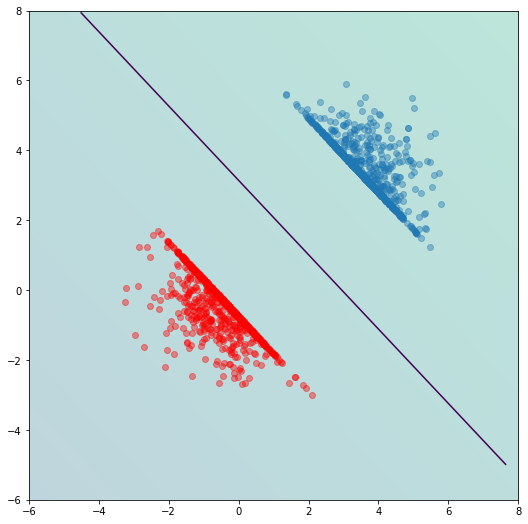

In [22]:
delta = 0.05
xx = np.arange(-5.0, 8.0, delta)
yy = np.arange(-5.0, 8.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
sz=XX.shape
test_data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);

idx = y==1
plt.scatter(x_mod[idx.ravel(),0],x_mod[idx.ravel(),1],alpha=0.4)
idx = y==-1
plt.scatter(x_mod[idx.ravel(),0],x_mod[idx.ravel(),1],alpha=0.4,color='red')

Z = f.forward(test_data)
Z.shape=sz

plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-6,8,-6,8),alpha=0.3, vmin=-15, vmax=15)
plt.contour(XX,YY,Z,[0])
fig = plt.gcf()
fig.set_size_inches(9,9)

## Let us start climbing some abstraction layers using Tensorflow

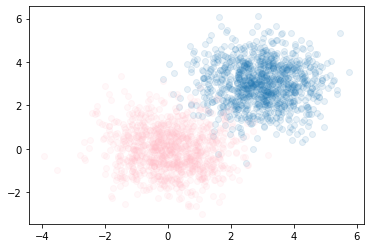

In [23]:
import numpy as np

#Example dataset
N_samples_per_class = 1000
d_dimensions = 2
x = np.vstack((np.random.randn(N_samples_per_class, d_dimensions),np.random.randn(N_samples_per_class, d_dimensions)+np.array([3,3])))
y = np.vstack((np.zeros((N_samples_per_class,1)),1.*np.ones((N_samples_per_class,1))))

x = x.astype('float32')
y = y.astype('float32')

%matplotlib inline
import matplotlib.pyplot as plt

idx = y==1
plt.scatter(x[idx.ravel(),0],x[idx.ravel(),1],alpha=0.1)
idx = y==0
plt.scatter(x[idx.ravel(),0],x[idx.ravel(),1],alpha=0.1,color='pink')

In [24]:
import tensorflow as tf

class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.a = tf.Variable([[0.1],[0.2]],trainable=True,dtype=tf.float32)
        self.b = tf.Variable([0.3],trainable=True,dtype=tf.float32)

    def call(self, x):
        return tf.add(tf.matmul(x,self.a),tf.broadcast_to(self.b, [x.shape[0],1])) 

# Create an instance of the model
model = MyModel()

In [26]:
loss_object = tf.keras.losses.MeanSquaredError()

optimizer = tf.keras.optimizers.Adam()

In [27]:
@tf.function
def train_step(xi, yi):
    with tf.GradientTape() as tape:
        predictions = model(xi)
        loss = loss_object(yi, predictions)
    #Partial Loss with respect to trainable variables
    dL_dw = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(dL_dw, model.trainable_variables))

Observe that using ```tf.GradientTape()``` we can easily find the partial derivative without actually coding it. This is extremely useful as it allows us to have very complex models with crazy derivatives and we just let the code do that stuff for use. Let us see if it works...

In [28]:
EPOCHS = 5
BATCH_SIZE=10
train_ds = tf.data.Dataset.from_tensor_slices((x,y)).batch(BATCH_SIZE)
for epoch in range(EPOCHS):
    for xi, yi in train_ds:
        train_step(xi, yi)
        


In [29]:
predictions = model(x)

In [30]:
predictions

<tf.Tensor: shape=(2000, 1), dtype=float32, numpy=
array([[-0.22901273],
       [ 0.29503444],
       [-0.03211733],
       ...,
       [ 0.78085613],
       [ 0.64925146],
       [ 1.301743  ]], dtype=float32)>

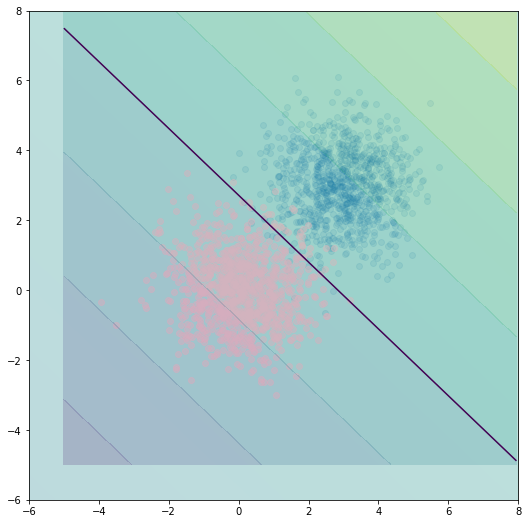

In [31]:
delta = 0.05
xx = np.arange(-5.0, 8.0, delta)
yy = np.arange(-5.0, 8.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
Xf = Xf.astype('float32')
Yf = Yf.astype('float32')
sz=XX.shape
test_data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);

idx = y==1
plt.scatter(x[idx.ravel(),0],x[idx.ravel(),1],alpha=0.1)
idx = y==0
plt.scatter(x[idx.ravel(),0],x[idx.ravel(),1],alpha=0.5,color='pink')

Z = model(test_data).numpy()
Z.shape=sz

plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-6,8,-6,8),alpha=0.3, vmin=-15, vmax=15)
plt.contourf(XX,YY,Z,alpha=0.2)
plt.contour(XX,YY,Z,[0.5])
fig = plt.gcf()
fig.set_size_inches(9,9)

## But... where this magic comes from? The flow of the chain rule

Let us try to understand visually what the chain rule is about. This will constitute the basis of the backpropagation algorithm, that will be next used to train deep learning techniques and the basis of **automatic differentiation**, a programatically optimum way for computing differentials.

### Computational graph

Consider the following function $f(x,y,z) = (x+y)\cdot z$. The computational graph corresponds to a graphical representation of the operations.

<img src = "comp_graph1.jpg"  width = "300">

Each of the archs can be labelled. This lets us to introduce a midpoint $q$.

Let us now look at the partial derivatives of each node with respect of its inputs. We have 

$$\frac{\partial f}{\partial f} = 1$$
$$\frac{\partial f}{\partial q} = z$$
$$\frac{\partial f}{\partial z} = q$$
$$\frac{\partial q}{\partial x} = 1$$
$$\frac{\partial q}{\partial y} = 1$$

Now, if we ask about the gradient with respect to any of the inputs, we can readily use the chain rule,

$$\frac{\partial f}{\partial x} = \frac{\partial f}{\partial q} \frac{\partial q}{\partial x} = z \cdot 1$$

$$\frac{\partial f}{\partial y} = \frac{\partial f}{\partial q} \frac{\partial q}{\partial y} = z\cdot 1$$

$$\frac{\partial f}{\partial z} = q $$


This flow is the basic idea behind **automatic differentiation** or **algorithmic differentiation**. The idea is we can create a computational graph, and take advantage of this parsing to readily compute differentials (or store the operations involved) as we parse the graph. There are two flavours of automatic differentiation, **forward** and **backward**. Corresponding to two different views of operating using the chain rule, e.g. given the following chain

$$\frac{\partial f}{\partial x} = \frac{\partial f}{\partial q} \frac{\partial q}{\partial u}\frac{\partial u}{\partial x},$$

we can operate, from the start of the graph in a forward mode, this is

$$\frac{\partial f}{\partial x} = \frac{\partial f}{\partial q} \big(\frac{\partial q}{\partial u}\frac{\partial u}{\partial x}\big),$$

or backwards, starting from the end of the graph

$$\frac{\partial f}{\partial x} = \big(\frac{\partial f}{\partial q} \frac{\partial q}{\partial u}\big)\frac{\partial u}{\partial x}.$$

Forward autodiff is usually interesting when we are in front of a vectorial function and we need to compute its Jacobian, i.e. $$F(x) = (f_1(x),f_2(x), \dots, f_N(x))$$ and we want to compute the Jacobian $$\frac{\partial F}{\partial x} = (\frac{\partial f_1(x)}{\partial x},\dots, \frac{\partial f_N(x)}{\partial x})$$.

Backward differentiation is particularly useful when computing gradients, this is given a function $f(x_1,\dots,x_N)$, its gradient is $$\nabla f = (\frac{\partial f}{\partial x_1},\dots,\frac{\partial f}{\partial x_N}).$$



### A simple example for forward autodiff

Let us recall the previous problem

$$f = (x+y)z$$

and write a program that solves it:

In [32]:
# Program 
x = ?
y = ?
z = ?
q = x + y
f = q*z

SyntaxError: invalid syntax (<ipython-input-32-8f7e4e27513d>, line 2)

Let us now write a program that computes the gradient with respect 

In [33]:
# Differentiation Program 
dx = ?
dy = ?
dz = ?
dq = dx + dy
df = q*dz + z*dq

SyntaxError: invalid syntax (<ipython-input-33-8eb15f585b58>, line 2)

Initializing $dx = 1$ and $dy=0$, $dz=0$ we are computing $df/dx$. Observe that we will get $df = z$. By initializing $dz = 1$ and the rest to zero we obtain $df = q$, this is $df = x+y$

**How would you automate that? What are the patters?** Overiding the operators and create in parallel both programs as we parse the computational graph.

## and now ... we are ready to start the class!

In standard usage of a deep learning framework we will even operate at a higher level. Let us now change this to an operational code.

In [34]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1, activation=None)
])

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

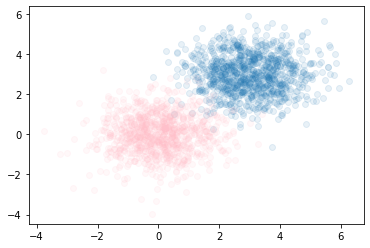

In [35]:
import numpy as np

#Example dataset
N_samples_per_class = 1000
d_dimensions = 2
x = np.vstack((np.random.randn(N_samples_per_class, d_dimensions),np.random.randn(N_samples_per_class, d_dimensions)+np.array([3,3])))
y = np.vstack((np.zeros((N_samples_per_class,1)),1.*np.ones((N_samples_per_class,1))))

x = x.astype('float32')
y = y.astype('float32')

%matplotlib inline
import matplotlib.pyplot as plt

idx = y==1
plt.scatter(x[idx.ravel(),0],x[idx.ravel(),1],alpha=0.1)
idx = y==0
plt.scatter(x[idx.ravel(),0],x[idx.ravel(),1],alpha=0.1,color='pink')

In [36]:

model.fit(x, y, epochs=1, batch_size = 1)

2000/2000 [==============================] - 1s 347us/step - loss: 0.0522 - accuracy: 0.9795


In [37]:
model.evaluate(x,  y, verbose=2)

63/63 - 0s - loss: 0.0463 - accuracy: 0.9830


[0.04626474156975746, 0.9829999804496765]

In [38]:
np.where(model.predict(x)>0.5,1.,-1.)

array([[-1.],
       [-1.],
       [-1.],
       ...,
       [ 1.],
       [ 1.],
       [ 1.]])

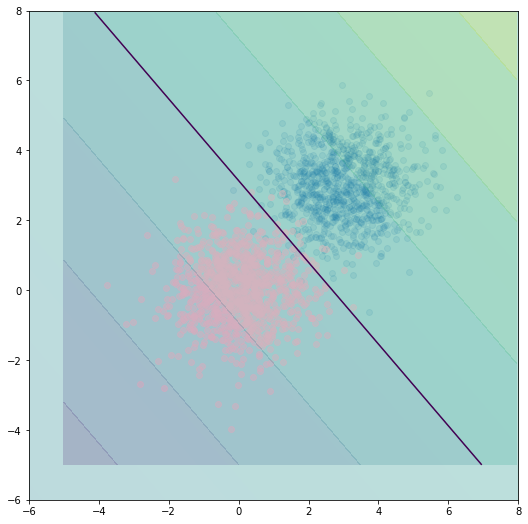

In [39]:
delta = 0.05
xx = np.arange(-5.0, 8.0, delta)
yy = np.arange(-5.0, 8.0, delta)
XX, YY = np.meshgrid(xx, yy)
Xf = XX.flatten()
Yf = YY.flatten()
sz=XX.shape
test_data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);

idx = y==1
plt.scatter(x[idx.ravel(),0],x[idx.ravel(),1],alpha=0.1)
idx = y==0
plt.scatter(x[idx.ravel(),0],x[idx.ravel(),1],alpha=0.5,color='pink')

Z = model.predict(test_data)
Z.shape=sz

plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-6,8,-6,8),alpha=0.3, vmin=-15, vmax=15)
plt.contourf(XX,YY,Z,alpha=0.2)
plt.contour(XX,YY,Z,[0.5])
fig = plt.gcf()
fig.set_size_inches(9,9)

# Deep models

Deep models are defined as the composition or stacking of functions. For example, consider the following graph

<img src="pipeline2.png" width = "300">

where 

$$y_2 = f_2(f_1(x)).$$

Observe that we are just changing the model while the loss and the optimization function remains the same.

Different to the other case the parameters are arranged in layers. Thus the computation of the gradient with respect to the parameters is a little more involved. However, we will use standard chain rule. In this case we want to find 

$$\frac{\partial \mathcal{L}}{\partial \bar{\omega_2}} = \frac{\partial \mathcal{L}}{\partial y_2}\frac{\partial y_2}{\partial \bar{\omega_2}}$$
and
$$\frac{\partial \mathcal{L}}{\partial \bar{\omega_1}} = \frac{\partial \mathcal{L}}{\partial y_2}\frac{\partial y_2}{\partial \bar{y_1}}\frac{\partial \bar{y_1}}{\partial \bar{\omega_1}}$$

Observe that this decomposition allows to decouple each layer in the following terms
$$\frac{\partial \mathcal{L}}{\partial \bar{\omega_1}} = \frac{\partial \mathcal{L}}{\partial \bar{y_1}}\frac{\partial \bar{y_1}}{\partial \bar{\omega_1}}$$

In general for $N$ layers the update of the parameters of the $m$-th layer is written as 
$$\frac{\partial \mathcal{L}}{\partial \bar{\omega_m}} = \frac{\partial \mathcal{L}}{\partial \bar{y_m}}\frac{\partial \bar{y_m}}{\partial \bar{\omega_m}} = \frac{\partial \mathcal{L}}{\partial \bar{y_N}}\prod\limits_{i=m}^{N-1}\frac{\partial \bar{y_{i+1}}}{\partial \bar{y_i}} \frac{\partial \bar{y_m}}{\partial \bar{\omega_m}}$$

Thus we have to define for each layer two gradients:
+ *the gradient with respect to the parameters* is the one used for updating the parameters
+ *the gradient with respect to the layer input* is the one needed to move backward the gradient of the loss and will be used for updating lower layers.






<div class = "alert alert-success" style = "border-radius:10px;border-width:3px"><b> In pairs:</b> Think about how would you update the weights in a deep model.</div>



<div class = "alert alert-info" style = "border-radius:10px;border-width:3px"> 
<b>TAKE HOME IDEAS:</b>      
    
The algorithm that sequentially updates the weights using Stochastic Descent approaches is commonly called <b>backpropagation</b>.

And the complexity of computing the derivatives involved in the potentially complex arquitectures that we will see in the course is what <b>automatic differentiation</b> hides!</div>



### 2.1 But what is deep learning about?

This is not a new technique. We are talking of good old *neural networks* with very minor changes.

Remember what a neural network is:

A neural network is an ensemble technique. The idea is to combine very simple bricks together to build up a usually feedforward network.

The base functions are called neurons and are usually of the following form:

$$h(x) = \sigma({\bf w}^T {\bf x})$$

where $\sigma$ is a non-linear function. 

<img src = './neuron.jpg' width = 400px>

And here comes the first change that helped deep learning to take off. This non-linear function was usually the sigmoid function:

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

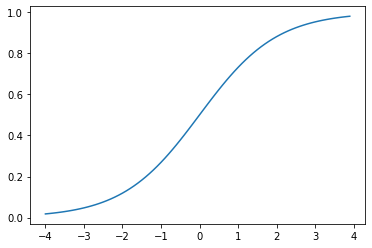

In [40]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-4,4,0.1)
sig = tf.nn.sigmoid(x)

plt.plot(x,sig.numpy())

### 2.2 Moving forward to "deep" representations

We can combine multiple layers of neurons. This will create a neural network. When the number of layers is sufficently large we call the network a *deep learner*. There are different kinds of NNs. In this basic tutorial we are concerned with NN composed of fully-connected layers.

<img src = './NN.jpg' width = 500px>

The definition of a deep model requires the same steps as described before. They are:

- Define the architecture
- Define the loss function
- Define the optimization algorithm



## Fully connected architectures

In [41]:
from sklearn.datasets import load_digits
import numpy as np
data=load_digits()
X_train = data.data/16.
y_train = data.target

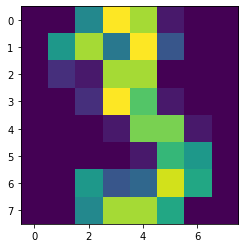

In [42]:
X_train[0,:]
import matplotlib.pyplot as plt

plt.imshow(X_train[3,:].reshape(8,8))

In [43]:
X_train.shape

(1797, 64)

In [44]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="sigmoid"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [45]:
model.fit(X_train, y_train, epochs=500, batch_size = 32)

Epoch 1/500
57/57 [==============================] - 0s 718us/step - loss: 8.6713 - accuracy: 0.1013
Epoch 2/500
57/57 [==============================] - 0s 700us/step - loss: 8.1445 - accuracy: 0.1013
Epoch 3/500
57/57 [==============================] - 0s 648us/step - loss: 8.1169 - accuracy: 0.1013
Epoch 4/500
57/57 [==============================] - 0s 630us/step - loss: 7.9923 - accuracy: 0.1013
Epoch 5/500
57/57 [==============================] - 0s 542us/step - loss: 7.9924 - accuracy: 0.1013
Epoch 6/500
57/57 [==============================] - 0s 560us/step - loss: 7.8360 - accuracy: 0.1013
Epoch 7/500
57/57 [==============================] - 0s 577us/step - loss: 7.6627 - accuracy: 0.1013
Epoch 8/500
57/57 [==============================] - 0s 595us/step - loss: 7.5211 - accuracy: 0.1013
Epoch 9/500
57/57 [==============================] - 0s 525us/step - loss: 7.2198 - accuracy: 0.1013
Epoch 10/500
57/57 [==============================] - 0s 560us/step - loss: 6.9192 - accura

57/57 [==============================] - 0s 612us/step - loss: 1.3392 - accuracy: 0.1519
Epoch 158/500
57/57 [==============================] - 0s 542us/step - loss: 1.3809 - accuracy: 0.1519
Epoch 159/500
57/57 [==============================] - 0s 560us/step - loss: 1.2995 - accuracy: 0.1491
Epoch 160/500
57/57 [==============================] - 0s 525us/step - loss: 1.3254 - accuracy: 0.1525
Epoch 161/500
57/57 [==============================] - 0s 577us/step - loss: 1.2711 - accuracy: 0.1508
Epoch 162/500
57/57 [==============================] - 0s 560us/step - loss: 1.2838 - accuracy: 0.1525
Epoch 163/500
57/57 [==============================] - 0s 542us/step - loss: 1.2704 - accuracy: 0.1547
Epoch 164/500
57/57 [==============================] - 0s 542us/step - loss: 1.2622 - accuracy: 0.1503
Epoch 165/500
57/57 [==============================] - 0s 525us/step - loss: 1.2738 - accuracy: 0.1491
Epoch 166/500
57/57 [==============================] - 0s 542us/step - loss: 1.2393 - a

57/57 [==============================] - 0s 577us/step - loss: 0.6380 - accuracy: 0.1603
Epoch 316/500
57/57 [==============================] - 0s 577us/step - loss: 0.6239 - accuracy: 0.1625
Epoch 317/500
57/57 [==============================] - 0s 595us/step - loss: 0.6295 - accuracy: 0.1580
Epoch 318/500
57/57 [==============================] - 0s 577us/step - loss: 0.6498 - accuracy: 0.1614
Epoch 319/500
57/57 [==============================] - 0s 595us/step - loss: 0.6370 - accuracy: 0.1586
Epoch 320/500
57/57 [==============================] - 0s 612us/step - loss: 0.6291 - accuracy: 0.1608
Epoch 321/500
57/57 [==============================] - 0s 595us/step - loss: 0.6150 - accuracy: 0.1547
Epoch 322/500
57/57 [==============================] - 0s 612us/step - loss: 0.6197 - accuracy: 0.1636
Epoch 323/500
57/57 [==============================] - 0s 551us/step - loss: 0.6161 - accuracy: 0.1614
Epoch 324/500
57/57 [==============================] - 0s 578us/step - loss: 0.6079 - a

57/57 [==============================] - 0s 682us/step - loss: 0.4286 - accuracy: 0.1720
Epoch 474/500
57/57 [==============================] - 0s 560us/step - loss: 0.4309 - accuracy: 0.1714
Epoch 475/500
57/57 [==============================] - 0s 577us/step - loss: 0.4293 - accuracy: 0.1703
Epoch 476/500
57/57 [==============================] - 0s 542us/step - loss: 0.4346 - accuracy: 0.1742
Epoch 477/500
57/57 [==============================] - 0s 595us/step - loss: 0.4320 - accuracy: 0.1720
Epoch 478/500
57/57 [==============================] - 0s 560us/step - loss: 0.4210 - accuracy: 0.1736
Epoch 479/500
57/57 [==============================] - 0s 560us/step - loss: 0.4341 - accuracy: 0.1692
Epoch 480/500
57/57 [==============================] - 0s 560us/step - loss: 0.4305 - accuracy: 0.1708
Epoch 481/500
57/57 [==============================] - 0s 595us/step - loss: 0.4275 - accuracy: 0.1714
Epoch 482/500
57/57 [==============================] - 0s 560us/step - loss: 0.4215 - a

In [46]:
model.evaluate(X_train,  y_train, verbose=2)

57/57 - 0s - loss: 0.3854 - accuracy: 0.1747


[0.3854309320449829, 0.1747356653213501]

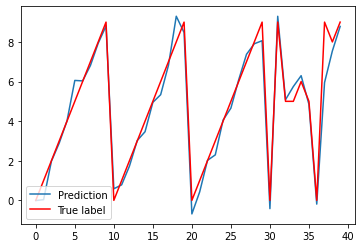

In [47]:
plt.plot(model.predict(X_train[0:40,:]),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

**Observations:** It works pretty well, check the following:
- Each layer defines the number of units/neurons. This means that the output of a layer with 100 units is a 100-dimensional vector.
- The "inner" layers use the non-linearity, but the output layer is different! **Why?**
- We introduce or use the concept of **batch** and its corresponding size in the optimization algorithm. Remember that in our current setting we approximate the true loss by a noisy approximation by considering a subset of the data instead of the full dataset at each parameter update.
- We used "mean squared error" but this is useful for regression problems. What about classification as in this case?

**Let us fix some of these issues before moving to nowadays strategies:** For the case of the loss, we can change it to a different representation:

- The output instead of a single integer value can be split using one-hot-encoding. This can be interpreted as drawing a probability for each class. This means that the last layer must comply with the probability axioms. 

The most common technique for that is the use of soft-max layer. A **soft-max** is defined as follows:

$$\sigma(x_i) = \frac{e^x_i}{\sum_j e^{x_j}}$$

This adds up to one for all outputs and the outputs themselves are in the range $[0,1)$.

Then, if the outputs are interpreted as probabilities, it is sensible to use loss functions that optimize probability outputs. One of these is the **cross-entropy** defined as follows:

Given $t_i$ and $y_i$ the target label and the prediction of sample $i$, respectively, the cross-entropy loss is defined as,

$$\mathcal{L}(t_i,y_i) = -\sum_{c=1}^K t_i^c \log{y_i^c}, $$

where $c$ is the super-script indexing the vector component, i.e. the $c$-th component of the vector, and $K$ the number of classes.


In [48]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="sigmoid"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

But now we have to one-hot encode the outputs...

In [49]:
oh_y_train = tf.one_hot(y_train, 10)

In [50]:
model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)

Epoch 1/750
57/57 [==============================] - 0s 648us/step - loss: 2.3946 - accuracy: 0.0985
Epoch 2/750
57/57 [==============================] - 0s 718us/step - loss: 2.3237 - accuracy: 0.1430
Epoch 3/750
57/57 [==============================] - 0s 630us/step - loss: 2.3038 - accuracy: 0.1464
Epoch 4/750
57/57 [==============================] - 0s 647us/step - loss: 2.2974 - accuracy: 0.1592
Epoch 5/750
57/57 [==============================] - 0s 630us/step - loss: 2.2946 - accuracy: 0.1786
Epoch 6/750
57/57 [==============================] - 0s 647us/step - loss: 2.2928 - accuracy: 0.1692
Epoch 7/750
57/57 [==============================] - 0s 612us/step - loss: 2.2910 - accuracy: 0.1814
Epoch 8/750
57/57 [==============================] - 0s 630us/step - loss: 2.2894 - accuracy: 0.2187
Epoch 9/750
57/57 [==============================] - 0s 612us/step - loss: 2.2878 - accuracy: 0.1758
Epoch 10/750
57/57 [==============================] - 0s 595us/step - loss: 2.2864 - accura

57/57 [==============================] - 0s 577us/step - loss: 0.9648 - accuracy: 0.8086
Epoch 161/750
57/57 [==============================] - 0s 542us/step - loss: 0.9559 - accuracy: 0.8141
Epoch 162/750
57/57 [==============================] - 0s 560us/step - loss: 0.9471 - accuracy: 0.8180
Epoch 163/750
57/57 [==============================] - 0s 577us/step - loss: 0.9384 - accuracy: 0.8175
Epoch 164/750
57/57 [==============================] - 0s 577us/step - loss: 0.9301 - accuracy: 0.8175
Epoch 165/750
57/57 [==============================] - 0s 630us/step - loss: 0.9214 - accuracy: 0.8130
Epoch 166/750
57/57 [==============================] - 0s 578us/step - loss: 0.9136 - accuracy: 0.8242
Epoch 167/750
57/57 [==============================] - 0s 612us/step - loss: 0.9051 - accuracy: 0.8258
Epoch 168/750
57/57 [==============================] - 0s 630us/step - loss: 0.8973 - accuracy: 0.8258
Epoch 169/750
57/57 [==============================] - 0s 595us/step - loss: 0.8893 - a

57/57 [==============================] - 0s 525us/step - loss: 0.3385 - accuracy: 0.9232
Epoch 319/750
57/57 [==============================] - 0s 577us/step - loss: 0.3371 - accuracy: 0.9238
Epoch 320/750
57/57 [==============================] - 0s 595us/step - loss: 0.3355 - accuracy: 0.9243
Epoch 321/750
57/57 [==============================] - 0s 559us/step - loss: 0.3340 - accuracy: 0.9238
Epoch 322/750
57/57 [==============================] - 0s 577us/step - loss: 0.3324 - accuracy: 0.9254
Epoch 323/750
57/57 [==============================] - 0s 613us/step - loss: 0.3312 - accuracy: 0.9243
Epoch 324/750
57/57 [==============================] - 0s 648us/step - loss: 0.3296 - accuracy: 0.9249
Epoch 325/750
57/57 [==============================] - 0s 630us/step - loss: 0.3280 - accuracy: 0.9249
Epoch 326/750
57/57 [==============================] - 0s 596us/step - loss: 0.3268 - accuracy: 0.9271
Epoch 327/750
57/57 [==============================] - 0s 613us/step - loss: 0.3254 - a

57/57 [==============================] - 0s 630us/step - loss: 0.2022 - accuracy: 0.9510
Epoch 476/750
57/57 [==============================] - 0s 613us/step - loss: 0.2015 - accuracy: 0.9510
Epoch 477/750
57/57 [==============================] - 0s 665us/step - loss: 0.2012 - accuracy: 0.9538
Epoch 478/750
57/57 [==============================] - 0s 595us/step - loss: 0.2006 - accuracy: 0.9516
Epoch 479/750
57/57 [==============================] - 0s 577us/step - loss: 0.2002 - accuracy: 0.9533
Epoch 480/750
57/57 [==============================] - 0s 595us/step - loss: 0.1997 - accuracy: 0.9538
Epoch 481/750
57/57 [==============================] - 0s 630us/step - loss: 0.1993 - accuracy: 0.9533
Epoch 482/750
57/57 [==============================] - 0s 612us/step - loss: 0.1987 - accuracy: 0.9527
Epoch 483/750
57/57 [==============================] - 0s 612us/step - loss: 0.1983 - accuracy: 0.9527
Epoch 484/750
57/57 [==============================] - 0s 578us/step - loss: 0.1978 - a

57/57 [==============================] - 0s 612us/step - loss: 0.1485 - accuracy: 0.9633
Epoch 635/750
57/57 [==============================] - 0s 560us/step - loss: 0.1483 - accuracy: 0.9616
Epoch 636/750
57/57 [==============================] - 0s 647us/step - loss: 0.1481 - accuracy: 0.9644
Epoch 637/750
57/57 [==============================] - 0s 647us/step - loss: 0.1478 - accuracy: 0.9627
Epoch 638/750
57/57 [==============================] - 0s 665us/step - loss: 0.1476 - accuracy: 0.9644
Epoch 639/750
57/57 [==============================] - 0s 735us/step - loss: 0.1474 - accuracy: 0.9616
Epoch 640/750
57/57 [==============================] - 0s 612us/step - loss: 0.1471 - accuracy: 0.9649
Epoch 641/750
57/57 [==============================] - 0s 665us/step - loss: 0.1470 - accuracy: 0.9633
Epoch 642/750
57/57 [==============================] - 0s 770us/step - loss: 0.1467 - accuracy: 0.9638
Epoch 643/750
57/57 [==============================] - 0s 664us/step - loss: 0.1465 - a

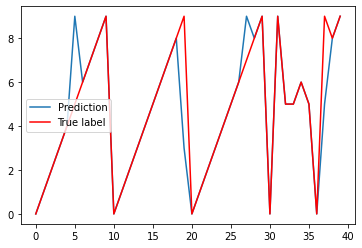

In [51]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [52]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

57/57 - 0s - loss: 0.1253 - accuracy: 0.9699


[0.1252851039171219, 0.9699499011039734]

## Deep learning ... deep problems

### PROBLEM 1: Dead neurons and vanishing gradients.

Let us add more layers. We will expect that we may learn even better.

In [53]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="sigmoid"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)

Epoch 1/750
57/57 [==============================] - 0s 683us/step - loss: 2.3523 - accuracy: 0.1057
Epoch 2/750
57/57 [==============================] - 0s 612us/step - loss: 2.3171 - accuracy: 0.1013
Epoch 3/750
57/57 [==============================] - 0s 577us/step - loss: 2.3075 - accuracy: 0.1091
Epoch 4/750
57/57 [==============================] - 0s 612us/step - loss: 2.3047 - accuracy: 0.0924
Epoch 5/750
57/57 [==============================] - 0s 577us/step - loss: 2.3043 - accuracy: 0.0907
Epoch 6/750
57/57 [==============================] - 0s 577us/step - loss: 2.3041 - accuracy: 0.0902
Epoch 7/750
57/57 [==============================] - 0s 595us/step - loss: 2.3039 - accuracy: 0.0890
Epoch 8/750
57/57 [==============================] - 0s 630us/step - loss: 2.3039 - accuracy: 0.0963
Epoch 9/750
57/57 [==============================] - 0s 560us/step - loss: 2.3037 - accuracy: 0.0935
Epoch 10/750
57/57 [==============================] - 0s 577us/step - loss: 2.3038 - accura

57/57 [==============================] - 0s 700us/step - loss: 2.3023 - accuracy: 0.1013
Epoch 161/750
57/57 [==============================] - 0s 700us/step - loss: 2.3021 - accuracy: 0.1080
Epoch 162/750
57/57 [==============================] - 0s 735us/step - loss: 2.3021 - accuracy: 0.1063
Epoch 163/750
57/57 [==============================] - 0s 647us/step - loss: 2.3020 - accuracy: 0.1018
Epoch 164/750
57/57 [==============================] - 0s 630us/step - loss: 2.3022 - accuracy: 0.1007
Epoch 165/750
57/57 [==============================] - 0s 648us/step - loss: 2.3023 - accuracy: 0.1024
Epoch 166/750
57/57 [==============================] - 0s 647us/step - loss: 2.3022 - accuracy: 0.0940
Epoch 167/750
57/57 [==============================] - 0s 647us/step - loss: 2.3020 - accuracy: 0.1002
Epoch 168/750
57/57 [==============================] - 0s 612us/step - loss: 2.3020 - accuracy: 0.1018
Epoch 169/750
57/57 [==============================] - 0s 647us/step - loss: 2.3022 - a

57/57 [==============================] - 0s 612us/step - loss: 2.2993 - accuracy: 0.1135
Epoch 319/750
57/57 [==============================] - 0s 718us/step - loss: 2.2991 - accuracy: 0.1091
Epoch 320/750
57/57 [==============================] - 0s 752us/step - loss: 2.2992 - accuracy: 0.1018
Epoch 321/750
57/57 [==============================] - 0s 717us/step - loss: 2.2991 - accuracy: 0.1219
Epoch 322/750
57/57 [==============================] - 0s 682us/step - loss: 2.2991 - accuracy: 0.1336
Epoch 323/750
57/57 [==============================] - 0s 735us/step - loss: 2.2991 - accuracy: 0.1252
Epoch 324/750
57/57 [==============================] - 0s 700us/step - loss: 2.2991 - accuracy: 0.1514
Epoch 325/750
57/57 [==============================] - 0s 736us/step - loss: 2.2990 - accuracy: 0.1119
Epoch 326/750
57/57 [==============================] - 0s 594us/step - loss: 2.2991 - accuracy: 0.1113
Epoch 327/750
57/57 [==============================] - 0s 595us/step - loss: 2.2989 - a

57/57 [==============================] - 0s 577us/step - loss: 2.2868 - accuracy: 0.1753
Epoch 477/750
57/57 [==============================] - 0s 595us/step - loss: 2.2863 - accuracy: 0.2076
Epoch 478/750
57/57 [==============================] - 0s 577us/step - loss: 2.2861 - accuracy: 0.2193
Epoch 479/750
57/57 [==============================] - 0s 542us/step - loss: 2.2859 - accuracy: 0.1920
Epoch 480/750
57/57 [==============================] - 0s 630us/step - loss: 2.2857 - accuracy: 0.2098
Epoch 481/750
57/57 [==============================] - 0s 612us/step - loss: 2.2856 - accuracy: 0.2471
Epoch 482/750
57/57 [==============================] - 0s 682us/step - loss: 2.2852 - accuracy: 0.2209
Epoch 483/750
57/57 [==============================] - 0s 647us/step - loss: 2.2853 - accuracy: 0.1976
Epoch 484/750
57/57 [==============================] - 0s 665us/step - loss: 2.2847 - accuracy: 0.2777
Epoch 485/750
57/57 [==============================] - 0s 682us/step - loss: 2.2845 - a

57/57 [==============================] - 0s 612us/step - loss: 1.7615 - accuracy: 0.2955
Epoch 635/750
57/57 [==============================] - 0s 612us/step - loss: 1.7582 - accuracy: 0.2994
Epoch 636/750
57/57 [==============================] - 0s 682us/step - loss: 1.7549 - accuracy: 0.3083
Epoch 637/750
57/57 [==============================] - 0s 647us/step - loss: 1.7519 - accuracy: 0.3116
Epoch 638/750
57/57 [==============================] - 0s 630us/step - loss: 1.7488 - accuracy: 0.3027
Epoch 639/750
57/57 [==============================] - 0s 577us/step - loss: 1.7457 - accuracy: 0.3272
Epoch 640/750
57/57 [==============================] - 0s 595us/step - loss: 1.7427 - accuracy: 0.3139
Epoch 641/750
57/57 [==============================] - 0s 665us/step - loss: 1.7399 - accuracy: 0.3011
Epoch 642/750
57/57 [==============================] - 0s 577us/step - loss: 1.7371 - accuracy: 0.3283
Epoch 643/750
57/57 [==============================] - 0s 595us/step - loss: 1.7347 - a

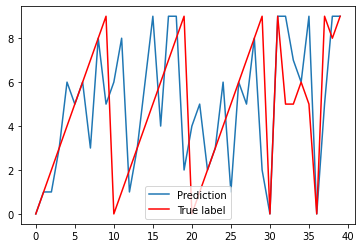

In [54]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [55]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

57/57 - 0s - loss: 1.5697 - accuracy: 0.3767


[1.5696531534194946, 0.3767389953136444]

<div class = "alert alert-danger" style = "border-radius:10px;border-width:3px"><b> Question:</b>What is wrong??????</div>



The problem lays in the neuron model and its working regime. This gives rise to the problem of  of **vanishing gradients** and **dead neurons** when learning the network. A simple way of solving this problem is to let the neuron model output to grow indefinitely on one side. The simplest model is the **Rectified Linear Unit**, i.e.

$$relu(x) = \max(0,x)$$



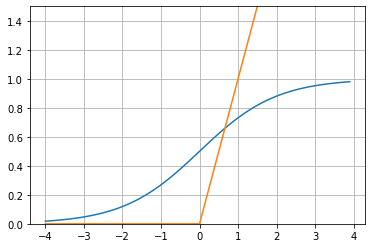

In [56]:
x = np.arange(-4,4,0.1)
rel = tf.nn.relu(x)

plt.plot(x,sig.numpy())
plt.plot(x,rel.numpy()) 
ax = plt.gca()
ax.set_ylim(0,1.5)
plt.grid('on')

Let us replace the activation with **ReLU**.

In [57]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)

Epoch 1/750
57/57 [==============================] - 0s 682us/step - loss: 2.2816 - accuracy: 0.1564
Epoch 2/750
57/57 [==============================] - 0s 700us/step - loss: 2.2360 - accuracy: 0.2137
Epoch 3/750
57/57 [==============================] - 0s 647us/step - loss: 2.1804 - accuracy: 0.2805
Epoch 4/750
57/57 [==============================] - 0s 630us/step - loss: 2.1034 - accuracy: 0.3578
Epoch 5/750
57/57 [==============================] - 0s 542us/step - loss: 1.9948 - accuracy: 0.4346
Epoch 6/750
57/57 [==============================] - 0s 534us/step - loss: 1.8454 - accuracy: 0.5097
Epoch 7/750
57/57 [==============================] - 0s 542us/step - loss: 1.6516 - accuracy: 0.5793
Epoch 8/750
57/57 [==============================] - 0s 648us/step - loss: 1.4352 - accuracy: 0.6205
Epoch 9/750
57/57 [==============================] - 0s 665us/step - loss: 1.2267 - accuracy: 0.6767
Epoch 10/750
57/57 [==============================] - 0s 647us/step - loss: 1.0360 - accura

57/57 [==============================] - 0s 683us/step - loss: 0.0110 - accuracy: 0.9989
Epoch 158/750
57/57 [==============================] - 0s 665us/step - loss: 0.0110 - accuracy: 0.9994
Epoch 159/750
57/57 [==============================] - 0s 665us/step - loss: 0.0104 - accuracy: 0.9994
Epoch 160/750
57/57 [==============================] - 0s 647us/step - loss: 0.0104 - accuracy: 0.9989
Epoch 161/750
57/57 [==============================] - 0s 700us/step - loss: 0.0100 - accuracy: 1.0000
Epoch 162/750
57/57 [==============================] - 0s 682us/step - loss: 0.0103 - accuracy: 0.9989
Epoch 163/750
57/57 [==============================] - 0s 700us/step - loss: 0.0099 - accuracy: 1.0000
Epoch 164/750
57/57 [==============================] - 0s 647us/step - loss: 0.0095 - accuracy: 1.0000
Epoch 165/750
57/57 [==============================] - 0s 647us/step - loss: 0.0097 - accuracy: 0.9994
Epoch 166/750
57/57 [==============================] - 0s 612us/step - loss: 0.0094 - a

57/57 [==============================] - 0s 595us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 316/750
57/57 [==============================] - 0s 630us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 317/750
57/57 [==============================] - 0s 577us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 318/750
57/57 [==============================] - 0s 595us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 319/750
57/57 [==============================] - 0s 542us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 320/750
57/57 [==============================] - 0s 560us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 321/750
57/57 [==============================] - 0s 578us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 322/750
57/57 [==============================] - 0s 595us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 323/750
57/57 [==============================] - 0s 822us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 324/750
57/57 [==============================] - 0s 665us/step - loss: 0.0024 - a

57/57 [==============================] - 0s 595us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 474/750
57/57 [==============================] - 0s 542us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 475/750
57/57 [==============================] - 0s 577us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 476/750
57/57 [==============================] - 0s 682us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 477/750
57/57 [==============================] - 0s 612us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 478/750
57/57 [==============================] - 0s 542us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 479/750
57/57 [==============================] - 0s 682us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 480/750
57/57 [==============================] - 0s 612us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 481/750
57/57 [==============================] - 0s 630us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 482/750
57/57 [==============================] - 0s 577us/step - loss: 0.0012 - a

57/57 [==============================] - 0s 613us/step - loss: 7.5635e-04 - accuracy: 1.0000
Epoch 628/750
57/57 [==============================] - 0s 595us/step - loss: 7.5940e-04 - accuracy: 1.0000
Epoch 629/750
57/57 [==============================] - 0s 595us/step - loss: 7.5207e-04 - accuracy: 1.0000
Epoch 630/750
57/57 [==============================] - 0s 997us/step - loss: 7.5069e-04 - accuracy: 1.0000
Epoch 631/750
57/57 [==============================] - 0s 630us/step - loss: 7.4960e-04 - accuracy: 1.0000
Epoch 632/750
57/57 [==============================] - 0s 577us/step - loss: 7.4582e-04 - accuracy: 1.0000
Epoch 633/750
57/57 [==============================] - 0s 560us/step - loss: 7.4754e-04 - accuracy: 1.0000
Epoch 634/750
57/57 [==============================] - 0s 630us/step - loss: 7.4168e-04 - accuracy: 1.0000
Epoch 635/750
57/57 [==============================] - 0s 630us/step - loss: 7.4160e-04 - accuracy: 1.0000
Epoch 636/750
57/57 [==============================

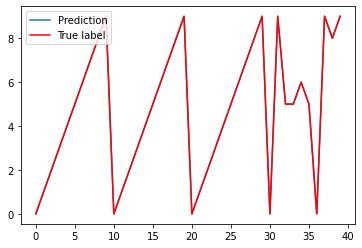

In [58]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [59]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

57/57 - 0s - loss: 5.6103e-04 - accuracy: 1.0000


[0.0005610301159322262, 1.0]



<div class = "alert alert-info" style = "border-radius:10px;border-width:3px"> 
<b>TAKE HOME IDEA:</b>    

There are different non-linear activations that can be used to address the challenges of dead neurons and vanishing gradients, such as ReLU, SeLU, Leaky ReLU, etc. These units are important because they allow the signal to flow forward and the gradient to flow backwards.

</div>



### PROBLEM 2: Internal covariate shift

and we are very HAPPY and try even more deep models!!!!!

In [60]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(40, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)


Epoch 1/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3028 - accuracy: 0.0801
Epoch 2/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3027 - accuracy: 0.0890
Epoch 3/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3027 - accuracy: 0.0985
Epoch 4/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3027 - accuracy: 0.0879
Epoch 5/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3027 - accuracy: 0.0974
Epoch 6/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3027 - accuracy: 0.0924
Epoch 7/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3027 - accuracy: 0.0918
Epoch 8/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3027 - accuracy: 0.0979
Epoch 9/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3027 - accuracy: 0.1007
Epoch 10/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3027 - accuracy: 0.1013
Epoch 11/

57/57 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.0968
Epoch 163/750
57/57 [==============================] - 0s 962us/step - loss: 2.3026 - accuracy: 0.0968
Epoch 164/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.0863
Epoch 165/750
57/57 [==============================] - 0s 997us/step - loss: 2.3026 - accuracy: 0.0957
Epoch 166/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.1002
Epoch 167/750
57/57 [==============================] - 0s 997us/step - loss: 2.3026 - accuracy: 0.1018
Epoch 168/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 169/750
57/57 [==============================] - 0s 962us/step - loss: 2.3026 - accuracy: 0.0991
Epoch 170/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.0996
Epoch 171/750
57/57 [==============================] - 0s 980us/step - loss: 2.3026 - accuracy: 0

57/57 [==============================] - 0s 945us/step - loss: 2.3026 - accuracy: 0.1018
Epoch 322/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 323/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 324/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 325/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 326/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 327/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 328/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 329/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 330/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.1018
Ep

57/57 [==============================] - 0s 997us/step - loss: 2.3026 - accuracy: 0.0957
Epoch 482/750
57/57 [==============================] - 0s 980us/step - loss: 2.3026 - accuracy: 0.1013
Epoch 483/750
57/57 [==============================] - 0s 980us/step - loss: 2.3026 - accuracy: 0.0835
Epoch 484/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.1007
Epoch 485/750
57/57 [==============================] - 0s 980us/step - loss: 2.3026 - accuracy: 0.0952
Epoch 486/750
57/57 [==============================] - 0s 980us/step - loss: 2.3026 - accuracy: 0.1002
Epoch 487/750
57/57 [==============================] - 0s 962us/step - loss: 2.3026 - accuracy: 0.0890
Epoch 488/750
57/57 [==============================] - 0s 962us/step - loss: 2.3026 - accuracy: 0.0985
Epoch 489/750
57/57 [==============================] - 0s 875us/step - loss: 2.3026 - accuracy: 0.0952
Epoch 490/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3026 - accur

57/57 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 641/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 642/750
57/57 [==============================] - 0s 997us/step - loss: 2.3026 - accuracy: 0.1018
Epoch 643/750
57/57 [==============================] - 0s 980us/step - loss: 2.3026 - accuracy: 0.1018
Epoch 644/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 645/750
57/57 [==============================] - 0s 997us/step - loss: 2.3026 - accuracy: 0.1018
Epoch 646/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 647/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 648/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.1018
Epoch 649/750
57/57 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.101

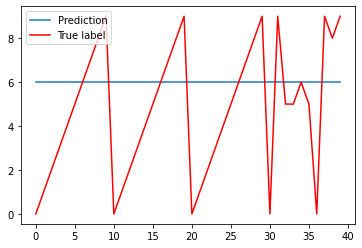

In [61]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [62]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

57/57 - 0s - loss: 2.3025 - accuracy: 0.1007


[2.30248761177063, 0.10072343051433563]

<div class = "alert alert-danger" style = "border-radius:10px;border-width:3px"><b> Question:</b> WHAT?????? WHY???? Didn't we just solved the problem?</div>



In [63]:
tf.keras.backend.clear_session()


inputs = tf.keras.Input(shape=(64,))
x = tf.keras.layers.Dense(100, activation="relu")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)

Epoch 1/750
57/57 [==============================] - 0s 2ms/step - loss: 2.3027 - accuracy: 0.0890
Epoch 2/750
57/57 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1063
Epoch 3/750
57/57 [==============================] - 0s 2ms/step - loss: 2.3028 - accuracy: 0.0963
Epoch 4/750
57/57 [==============================] - 0s 2ms/step - loss: 2.3027 - accuracy: 0.0885
Epoch 5/750
57/57 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.0985
Epoch 6/750
57/57 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1085
Epoch 7/750
57/57 [==============================] - 0s 2ms/step - loss: 2.3028 - accuracy: 0.0996
Epoch 8/750
57/57 [==============================] - 0s 2ms/step - loss: 2.3027 - accuracy: 0.0979
Epoch 9/750
57/57 [==============================] - 0s 2ms/step - loss: 2.3025 - accuracy: 0.0985
Epoch 10/750
57/57 [==============================] - 0s 2ms/step - loss: 2.3025 - accuracy: 0.0991
Epoch 11/

57/57 [==============================] - 0s 1ms/step - loss: 1.1909 - accuracy: 0.4930
Epoch 84/750
57/57 [==============================] - 0s 1ms/step - loss: 1.1685 - accuracy: 0.5175
Epoch 85/750
57/57 [==============================] - 0s 1ms/step - loss: 1.1564 - accuracy: 0.5543
Epoch 86/750
57/57 [==============================] - 0s 1ms/step - loss: 1.1550 - accuracy: 0.5598
Epoch 87/750
57/57 [==============================] - 0s 1ms/step - loss: 1.0864 - accuracy: 0.5520
Epoch 88/750
57/57 [==============================] - 0s 1ms/step - loss: 1.1077 - accuracy: 0.5331
Epoch 89/750
57/57 [==============================] - 0s 1ms/step - loss: 1.2540 - accuracy: 0.5025
Epoch 90/750
57/57 [==============================] - 0s 2ms/step - loss: 1.0517 - accuracy: 0.5765
Epoch 91/750
57/57 [==============================] - 0s 1ms/step - loss: 1.0628 - accuracy: 0.5659
Epoch 92/750
57/57 [==============================] - 0s 2ms/step - loss: 1.1051 - accuracy: 0.5787
Epoch 93/750


57/57 [==============================] - 0s 1ms/step - loss: 0.9687 - accuracy: 0.6127
Epoch 245/750
57/57 [==============================] - 0s 1ms/step - loss: 0.9054 - accuracy: 0.6622
Epoch 246/750
57/57 [==============================] - 0s 2ms/step - loss: 0.8368 - accuracy: 0.6683
Epoch 247/750
57/57 [==============================] - 0s 2ms/step - loss: 0.8195 - accuracy: 0.6733
Epoch 248/750
57/57 [==============================] - 0s 1ms/step - loss: 0.8370 - accuracy: 0.6756
Epoch 249/750
57/57 [==============================] - 0s 2ms/step - loss: 0.8290 - accuracy: 0.6800
Epoch 250/750
57/57 [==============================] - 0s 2ms/step - loss: 0.9917 - accuracy: 0.6244
Epoch 251/750
57/57 [==============================] - 0s 2ms/step - loss: 0.8795 - accuracy: 0.6761
Epoch 252/750
57/57 [==============================] - 0s 2ms/step - loss: 0.7608 - accuracy: 0.6939
Epoch 253/750
57/57 [==============================] - 0s 2ms/step - loss: 0.7588 - accuracy: 0.7001
Epoc

57/57 [==============================] - 0s 1ms/step - loss: 0.1480 - accuracy: 0.9661
Epoch 406/750
57/57 [==============================] - 0s 1ms/step - loss: 0.2330 - accuracy: 0.9477
Epoch 407/750
57/57 [==============================] - 0s 1ms/step - loss: 0.1615 - accuracy: 0.9666
Epoch 408/750
57/57 [==============================] - 0s 1ms/step - loss: 0.1964 - accuracy: 0.9527
Epoch 409/750
57/57 [==============================] - 0s 1ms/step - loss: 0.1775 - accuracy: 0.9616
Epoch 410/750
57/57 [==============================] - 0s 1ms/step - loss: 0.1370 - accuracy: 0.9694
Epoch 411/750
57/57 [==============================] - 0s 1ms/step - loss: 0.1612 - accuracy: 0.9627
Epoch 412/750
57/57 [==============================] - 0s 2ms/step - loss: 0.2171 - accuracy: 0.9438
Epoch 413/750
57/57 [==============================] - 0s 1ms/step - loss: 0.1910 - accuracy: 0.9572
Epoch 414/750
57/57 [==============================] - 0s 1ms/step - loss: 0.2488 - accuracy: 0.9455
Epoc

57/57 [==============================] - 0s 2ms/step - loss: 0.0932 - accuracy: 0.9783
Epoch 566/750
57/57 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9661
Epoch 567/750
57/57 [==============================] - 0s 1ms/step - loss: 0.0784 - accuracy: 0.9794
Epoch 568/750
57/57 [==============================] - 0s 2ms/step - loss: 0.1098 - accuracy: 0.9755
Epoch 569/750
57/57 [==============================] - 0s 2ms/step - loss: 0.1146 - accuracy: 0.9761
Epoch 570/750
57/57 [==============================] - 0s 2ms/step - loss: 0.0802 - accuracy: 0.9805
Epoch 571/750
57/57 [==============================] - 0s 2ms/step - loss: 0.0734 - accuracy: 0.9805
Epoch 572/750
57/57 [==============================] - 0s 1ms/step - loss: 0.0658 - accuracy: 0.9850
Epoch 573/750
57/57 [==============================] - 0s 2ms/step - loss: 0.0792 - accuracy: 0.9827
Epoch 574/750
57/57 [==============================] - 0s 2ms/step - loss: 0.0922 - accuracy: 0.9722
Epoc

57/57 [==============================] - 0s 1ms/step - loss: 0.0800 - accuracy: 0.9811
Epoch 728/750
57/57 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9878
Epoch 729/750
57/57 [==============================] - 0s 2ms/step - loss: 0.0648 - accuracy: 0.9827
Epoch 730/750
57/57 [==============================] - 0s 2ms/step - loss: 0.0696 - accuracy: 0.9844
Epoch 731/750
57/57 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.9839
Epoch 732/750
57/57 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9872
Epoch 733/750
57/57 [==============================] - ETA: 0s - loss: 0.0942 - accuracy: 0.97 - 0s 2ms/step - loss: 0.0954 - accuracy: 0.9772
Epoch 734/750
57/57 [==============================] - 0s 2ms/step - loss: 0.0588 - accuracy: 0.9878
Epoch 735/750
57/57 [==============================] - 0s 2ms/step - loss: 0.0672 - accuracy: 0.9833
Epoch 736/750
57/57 [==============================] - 0s 2ms/s

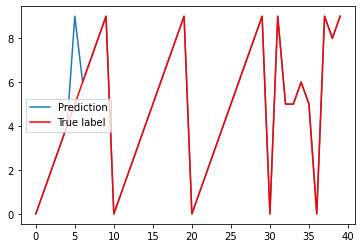

In [64]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [65]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

57/57 - 0s - loss: 0.0345 - accuracy: 0.9983


[0.03448052704334259, 0.9983305335044861]

In [66]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense (Dense)                (None, 100)               6500      
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 40)                4040      
_________________________________________________________________
batch_normalization_1 (Batch (None, 40)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
batch_normalization_2 (Batch (None, 20)               

In [67]:
from tensorflow.keras import backend as K

# with a Sequential model
inp = model.input  
get_1st_output = K.function(inp,[model.layers[1].output])
layer_output = get_1st_output(X_train)

(array([  4.,   9.,  19.,  43.,  53., 102., 136., 162., 155., 171., 155.,
        164., 125., 108., 111.,  71.,  56.,  44.,  25.,  27.,  14.,  10.,
         14.,  11.,   6.,   0.,   0.,   1.,   0.,   1.]),
 array([2.29875685, 2.52231977, 2.7458827 , 2.96944562, 3.19300855,
        3.41657148, 3.6401344 , 3.86369733, 4.08726025, 4.31082318,
        4.53438611, 4.75794903, 4.98151196, 5.20507488, 5.42863781,
        5.65220074, 5.87576366, 6.09932659, 6.32288951, 6.54645244,
        6.77001537, 6.99357829, 7.21714122, 7.44070414, 7.66426707,
        7.88783   , 8.11139292, 8.33495585, 8.55851877, 8.7820817 ,
        9.00564463]),
 <a list of 30 Patch objects>)

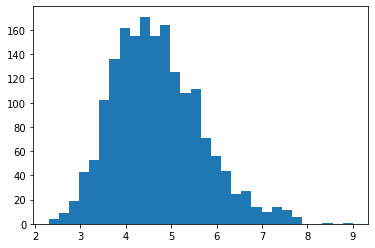

In [68]:
m = np.mean(X_train,axis=0)
plt.hist(np.sum(np.power(X_train-np.tile(m,(X_train.shape[0],1)),2),axis=1),bins=30)

In [69]:
layer_output

[array([[0.0000000e+00, 0.0000000e+00, 3.5208724e-02, ..., 0.0000000e+00,
         0.0000000e+00, 2.3386688e+00],
        [2.4713278e-03, 0.0000000e+00, 9.5637548e-01, ..., 0.0000000e+00,
         0.0000000e+00, 1.5950798e+00],
        [0.0000000e+00, 0.0000000e+00, 6.3207126e-01, ..., 0.0000000e+00,
         0.0000000e+00, 2.1209166e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 7.7616179e-01, ..., 0.0000000e+00,
         0.0000000e+00, 2.7259197e+00],
        [0.0000000e+00, 0.0000000e+00, 5.8817804e-01, ..., 0.0000000e+00,
         0.0000000e+00, 2.2981517e+00],
        [0.0000000e+00, 0.0000000e+00, 1.0341295e+00, ..., 0.0000000e+00,
         0.0000000e+00, 1.8472949e+00]], dtype=float32)]

(array([ 29.,  72., 151., 241., 238., 246., 195., 168., 110.,  81.,  55.,
         42.,  28.,  21.,  16.,   9.,   9.,   6.,  11.,   7.,  10.,   7.,
          6.,  10.,   7.,   7.,   8.,   1.,   4.,   2.]),
 array([ 7.484697, 10.49851 , 13.512324, 16.526138, 19.539951, 22.553766,
        25.56758 , 28.581392, 31.595207, 34.60902 , 37.622833, 40.636646,
        43.650463, 46.664276, 49.67809 , 52.691902, 55.705715, 58.719532,
        61.733345, 64.747154, 67.76097 , 70.77479 , 73.7886  , 76.802414,
        79.81622 , 82.83004 , 85.84386 , 88.857666, 91.87148 , 94.88529 ,
        97.89911 ], dtype=float32),
 <a list of 30 Patch objects>)

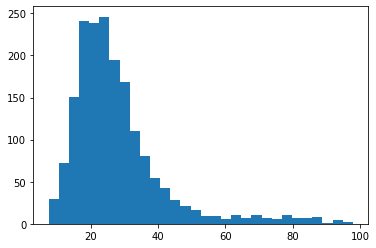

In [70]:
m = np.mean(layer_output[0],axis=0)
plt.hist(np.sum(np.power(layer_output[0]-np.tile(m,(X_train.shape[0],1)),2),axis=1),bins=30)

In [71]:
from tensorflow.keras import backend as K

# with a Sequential model
inp = model.input  
get_batch_output = K.function(inp,[model.layers[2].output])
batch_output = get_batch_output(X_train)

(array([  9.,  43.,  93., 176., 230., 279., 236., 209., 150., 104.,  68.,
         35.,  22.,  23.,  14.,   9.,   8.,  13.,  10.,  11.,   4.,   9.,
          6.,   3.,   6.,   5.,   7.,   6.,   5.,   4.]),
 array([ 17.177982,  22.071182,  26.964384,  31.857584,  36.750786,
         41.643986,  46.537186,  51.430386,  56.323586,  61.21679 ,
         66.109985,  71.00319 ,  75.89639 ,  80.78959 ,  85.68279 ,
         90.57599 ,  95.46919 , 100.36239 , 105.25559 , 110.148796,
        115.04199 , 119.935196, 124.82839 , 129.72159 , 134.61479 ,
        139.508   , 144.4012  , 149.2944  , 154.18759 , 159.0808  ,
        163.974   ], dtype=float32),
 <a list of 30 Patch objects>)

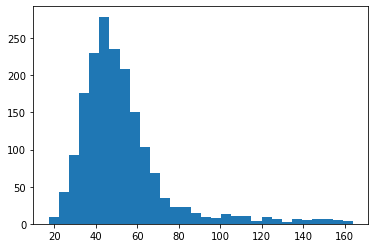

In [72]:
m = np.mean(batch_output[0],axis=0)
plt.hist(np.sum(np.power(batch_output[0]-np.tile(m,(X_train.shape[0],1)),2),axis=1),bins=30)

Sooooo... if we reset statistics can ```sigmoid``` work? **YES!!!!**

Let's check it...

In [73]:
import tensorflow as tf
tf.keras.backend.clear_session()


inputs = tf.keras.Input(shape=(64,))
x = tf.keras.layers.Dense(100, activation="sigmoid")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="sigmoid")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)

Epoch 1/750
57/57 [==============================] - 0s 4ms/step - loss: 2.1965 - accuracy: 0.2326
Epoch 2/750
57/57 [==============================] - 0s 4ms/step - loss: 2.0073 - accuracy: 0.3856
Epoch 3/750
57/57 [==============================] - 0s 4ms/step - loss: 1.8979 - accuracy: 0.4953
Epoch 4/750
57/57 [==============================] - 0s 4ms/step - loss: 1.8040 - accuracy: 0.5743
Epoch 5/750
57/57 [==============================] - 0s 4ms/step - loss: 1.7294 - accuracy: 0.6349
Epoch 6/750
57/57 [==============================] - 0s 3ms/step - loss: 1.6599 - accuracy: 0.6594
Epoch 7/750
57/57 [==============================] - 0s 4ms/step - loss: 1.6042 - accuracy: 0.6722
Epoch 8/750
57/57 [==============================] - 0s 3ms/step - loss: 1.5380 - accuracy: 0.6962
Epoch 9/750
57/57 [==============================] - 0s 4ms/step - loss: 1.4952 - accuracy: 0.7001
Epoch 10/750
57/57 [==============================] - 0s 4ms/step - loss: 1.4325 - accuracy: 0.7101
Epoch 11/

57/57 [==============================] - 0s 3ms/step - loss: 0.3077 - accuracy: 0.9349
Epoch 84/750
57/57 [==============================] - 0s 3ms/step - loss: 0.3177 - accuracy: 0.9277
Epoch 85/750
57/57 [==============================] - 0s 4ms/step - loss: 0.3096 - accuracy: 0.9321
Epoch 86/750
57/57 [==============================] - 0s 3ms/step - loss: 0.3630 - accuracy: 0.9026
Epoch 87/750
57/57 [==============================] - 0s 3ms/step - loss: 0.2909 - accuracy: 0.9360
Epoch 88/750
57/57 [==============================] - 0s 3ms/step - loss: 0.3603 - accuracy: 0.9160
Epoch 89/750
57/57 [==============================] - 0s 3ms/step - loss: 0.6515 - accuracy: 0.7969
Epoch 90/750
57/57 [==============================] - 0s 3ms/step - loss: 0.4473 - accuracy: 0.8843
Epoch 91/750
57/57 [==============================] - 0s 4ms/step - loss: 0.3872 - accuracy: 0.9009
Epoch 92/750
57/57 [==============================] - 0s 3ms/step - loss: 0.3548 - accuracy: 0.9165
Epoch 93/750


57/57 [==============================] - 0s 3ms/step - loss: 0.2674 - accuracy: 0.9249
Epoch 246/750
57/57 [==============================] - 0s 4ms/step - loss: 0.2834 - accuracy: 0.9210
Epoch 247/750
57/57 [==============================] - 0s 4ms/step - loss: 0.3925 - accuracy: 0.8893
Epoch 248/750
57/57 [==============================] - 0s 5ms/step - loss: 0.2982 - accuracy: 0.9115
Epoch 249/750
57/57 [==============================] - 0s 4ms/step - loss: 0.2382 - accuracy: 0.9321
Epoch 250/750
57/57 [==============================] - 0s 3ms/step - loss: 0.2040 - accuracy: 0.9460
Epoch 251/750
57/57 [==============================] - 0s 3ms/step - loss: 0.3960 - accuracy: 0.8831
Epoch 252/750
57/57 [==============================] - 0s 4ms/step - loss: 0.2419 - accuracy: 0.9327
Epoch 253/750
57/57 [==============================] - 0s 5ms/step - loss: 0.2345 - accuracy: 0.9371
Epoch 254/750
57/57 [==============================] - 0s 4ms/step - loss: 0.2513 - accuracy: 0.9288
Epoc

57/57 [==============================] - 0s 3ms/step - loss: 0.1121 - accuracy: 0.9716
Epoch 407/750
57/57 [==============================] - 0s 3ms/step - loss: 0.1215 - accuracy: 0.9638
Epoch 408/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0939 - accuracy: 0.9761
Epoch 409/750
57/57 [==============================] - 0s 3ms/step - loss: 0.1113 - accuracy: 0.9683
Epoch 410/750
57/57 [==============================] - 0s 3ms/step - loss: 0.1127 - accuracy: 0.9716
Epoch 411/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0962 - accuracy: 0.9766
Epoch 412/750
57/57 [==============================] - 0s 3ms/step - loss: 0.1015 - accuracy: 0.9761
Epoch 413/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0879 - accuracy: 0.9789
Epoch 414/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0925 - accuracy: 0.9750
Epoch 415/750
57/57 [==============================] - 0s 3ms/step - loss: 0.1185 - accuracy: 0.9694
Epoc

57/57 [==============================] - 0s 3ms/step - loss: 0.0962 - accuracy: 0.9750
Epoch 567/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0798 - accuracy: 0.9811
Epoch 568/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0898 - accuracy: 0.9750
Epoch 569/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0887 - accuracy: 0.9772
Epoch 570/750
57/57 [==============================] - 0s 3ms/step - loss: 0.1053 - accuracy: 0.9705
Epoch 571/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0981 - accuracy: 0.9733
Epoch 572/750
57/57 [==============================] - 0s 3ms/step - loss: 0.1033 - accuracy: 0.9733
Epoch 573/750
57/57 [==============================] - 0s 3ms/step - loss: 0.1182 - accuracy: 0.9683
Epoch 574/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0757 - accuracy: 0.9816
Epoch 575/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0667 - accuracy: 0.9839
Epoc

57/57 [==============================] - 0s 3ms/step - loss: 0.0636 - accuracy: 0.9833
Epoch 728/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0845 - accuracy: 0.9811
Epoch 729/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0911 - accuracy: 0.9789
Epoch 730/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0460 - accuracy: 0.9872
Epoch 731/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0469 - accuracy: 0.9911
Epoch 732/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 0.9833
Epoch 733/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0801 - accuracy: 0.9772
Epoch 734/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.9878
Epoch 735/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0443 - accuracy: 0.9905
Epoch 736/750
57/57 [==============================] - 0s 3ms/step - loss: 0.0771 - accuracy: 0.9833
Epoc

In [74]:
model.evaluate(X_train,  oh_y_train.numpy(), verbose=2)

57/57 - 0s - loss: 0.0140 - accuracy: 0.9983


[0.013996212743222713, 0.9983305335044861]

## Errrrr ... btw, all the process was wrong! Where is training and test????

In [ ]:
from sklearn.datasets import load_digits
import numpy as np

from sklearn.model_selection import train_test_split

data=load_digits()
X = data.data/16.
y = data.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [ ]:
tf.keras.backend.clear_session()


inputs = tf.keras.Input(shape=(64,))
x = tf.keras.layers.Dense(100, activation="relu")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)

In [ ]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [ ]:
plt.plot(np.argmax(model.predict(X_test[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_test[0:40],color='r',label='True label')
plt.legend()

In [ ]:
model.evaluate(X_train,  oh_y_train, verbose=2)

In [ ]:
oh_y_test = tf.one_hot(y_test, 10)

model.evaluate(X_test,  oh_y_test, verbose=2)

You are making me crazy... now what!!!!!!!!



<div class = "alert alert-warning" style = "border-radius:10px;border-width:3px"> 
<b>TAKE HOME IDEA:</b>    

I am sure you know about PAC learning and concentration of measure inequalities and the trade-off between complexity and number of samples. In this case, we have very few samples. How can we synthetically "augment data". Enter the dragon! ... ops... Enter the <b>dropout</b>!

</div>



In [ ]:
tf.keras.backend.clear_session()


inputs = tf.keras.Input(shape=(64,))
x = tf.keras.layers.Dropout(0.1)(inputs)
x = tf.keras.layers.Dense(100, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

oh_y_train = tf.one_hot(y_train, 10)

model.fit(X_train, oh_y_train.numpy(), epochs=750, batch_size = 32)

In [ ]:
plt.plot(np.argmax(model.predict(X_train[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [ ]:
model.evaluate(X_train,  oh_y_train, verbose=2)

In [ ]:
plt.plot(np.argmax(model.predict(X_test[0:40,:]),axis=1),label = 'Prediction')
plt.plot(y_test[0:40],color='r',label='True label')
plt.legend()

In [ ]:
oh_y_test = tf.one_hot(y_test, 10)

model.evaluate(X_test,  oh_y_test, verbose=2)



<div class = "alert alert-warning" style = "border-radius:10px;border-width:3px"> 
<b>Oh my ... This is just AWESOME!!!!! We recovered some prediction power!!!!</b>    
</div>



## Interpreting deep learning as feature representations 



<div class = "alert alert-info" style = "border-radius:10px;border-width:3px"> 
<b>THE FINAL AND MOST IMPORTANT TAKE HOME IDEA:</b>    
    
Deep learning is all about learning representations. As a classifier it is a fiasco. But then... how does it work so well? Because all layers up to the last one can be interpreted as transformations of the data. And just the last layer is the classification step. For examples in the case of soft-max the decision boundary is linear. This is a really simple classifier, thus if the network is to work well the transformation must be such that a linear classifier is able to perform well enough.

<b>This is really what deep learning is about!</b>
</div>



Let us check this out. We will recover a relative ok classification such as the last model trained, slice the last layer, and replace it with a real classifier... and see what happens.

First, let us access the last layer representation:

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras import backend as K

# with a Sequential model
inp = model.input  
get_batch_output = K.function(inp,[model.layers[31].output])
batch_output = get_batch_output(X_train)

In [ ]:
batch_output

In [ ]:
from sklearn import ensemble

clf = ensemble.RandomForestClassifier(51)
clf.fit(batch_output[0],y_train)

In [ ]:
bo = batch_output[0]
plt.plot(clf.predict(bo[0:40,:]),label = 'Prediction')
plt.plot(y_train[0:40],color='r',label='True label')
plt.legend()

In [ ]:
np.mean(np.where(np.abs(clf.predict(bo)-y_train)<1e-6,1.,0.))

In [ ]:
batch_output = get_batch_output(X_test)

bo = batch_output[0]
plt.plot(clf.predict(bo[0:40,:]),label = 'Prediction')
plt.plot(y_test[0:40],color='r',label='True label')
plt.legend()

In [ ]:
np.mean(np.where(np.abs(clf.predict(bo)-y_test)<1e-6,1.,0.))

# Recap exercise



<div class = "alert alert-success" style = "border-radius:10px;border-width:3px"> 
<b>EXERCISE: </b> It is your turn to code a deep feed forward neural network to solve the problem of classifying fashion images.
    
<b>RULES: </b> Solve the problem with maximum accuracy but with the smallest amount of <b>trainable parameters</b>. To check the amount of parameters use ```model.summary()```.
</div>



In [ ]:
#Load data set

import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
%matplotlib inline

#Check some basic info
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(train_images[0],cmap='gray')
print('Label:'+str(train_labels[0]))
print('Number of unique labels: '+str(np.unique(train_labels)))
print('Data set size: ' + str(train_images.shape))

In [ ]:
#Rasterize data

X_train = np.reshape(train_images,(train_images.shape[0],train_images.shape[1]*train_images.shape[2]))
y_train = train_labels
X_test = np.reshape(test_images,(test_images.shape[0],test_images.shape[1]*test_images.shape[2]))
y_test = test_labels


In [ ]:
X_test.shape

In [ ]:
#Use X_train, y_train, X_test, y_test to code your deep learning code